### About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#### How we can help here? ####

The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands

In [1]:
# import required modules
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
current_palette = sns.color_palette('colorblind')
from datetime import datetime,timedelta,date

In [2]:
# read data
yulu_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [3]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Checking the dimensions of the dataset
print("Rows : {} ,Columns : {}".format(yulu_df.shape[0],yulu_df.shape[1]))

Rows : 10886 ,Columns : 12


In [5]:
yulu_df.info() #Display Details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
yulu_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

##### The dataset doesn't have any null values!

In [7]:
yulu_df.describe() #Statistical Summary

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Convert season, holiday, workingday and weather into object data type
cols = ['season','holiday', 'workingday', 'weather']
yulu_df[cols] = yulu_df[cols].astype('object')

In [9]:
# Convert Datetime to datetime
yulu_df["datetime"] = yulu_df["datetime"].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ))

In [10]:
yulu_df.describe() #Statistical Summary

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### Just by looking at the above descriptive stats, we can see that there could be outliers in "casual" and "registered", as the difference between mean and median is huge. 
#### Also, the satndard deviation is high, which could mean that the data is more spread out

### 1. Univariate Analysis

In [11]:
cat_cols = [ele for ele in yulu_df.select_dtypes(include=['object']).columns] #Categorical Columns

for col in cat_cols: #Filtering out non-numeric columns
    print("Value Counts for {}".format(col))
    print(round(yulu_df[col].value_counts(normalize=True)*100,2)) #Displaying frequency distribution of categorical Variables
    print("----------------------------")

Value Counts for season
4    25.11
2    25.11
3    25.11
1    24.67
Name: season, dtype: float64
----------------------------
Value Counts for holiday
0    97.14
1     2.86
Name: holiday, dtype: float64
----------------------------
Value Counts for workingday
1    68.09
0    31.91
Name: workingday, dtype: float64
----------------------------
Value Counts for weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64
----------------------------


In [12]:
#Summarizing the number of unique values in each column
unique_counts=pd.DataFrame.from_records([(col,yulu_df[col].nunique()) for col in cat_cols],columns=['Column_Name','Num_Unique'])
unique_counts.sort_values(by='Num_Unique')

,Column_Name,Num_Unique
1,holiday,2
2,workingday,2
0,season,4
3,weather,4


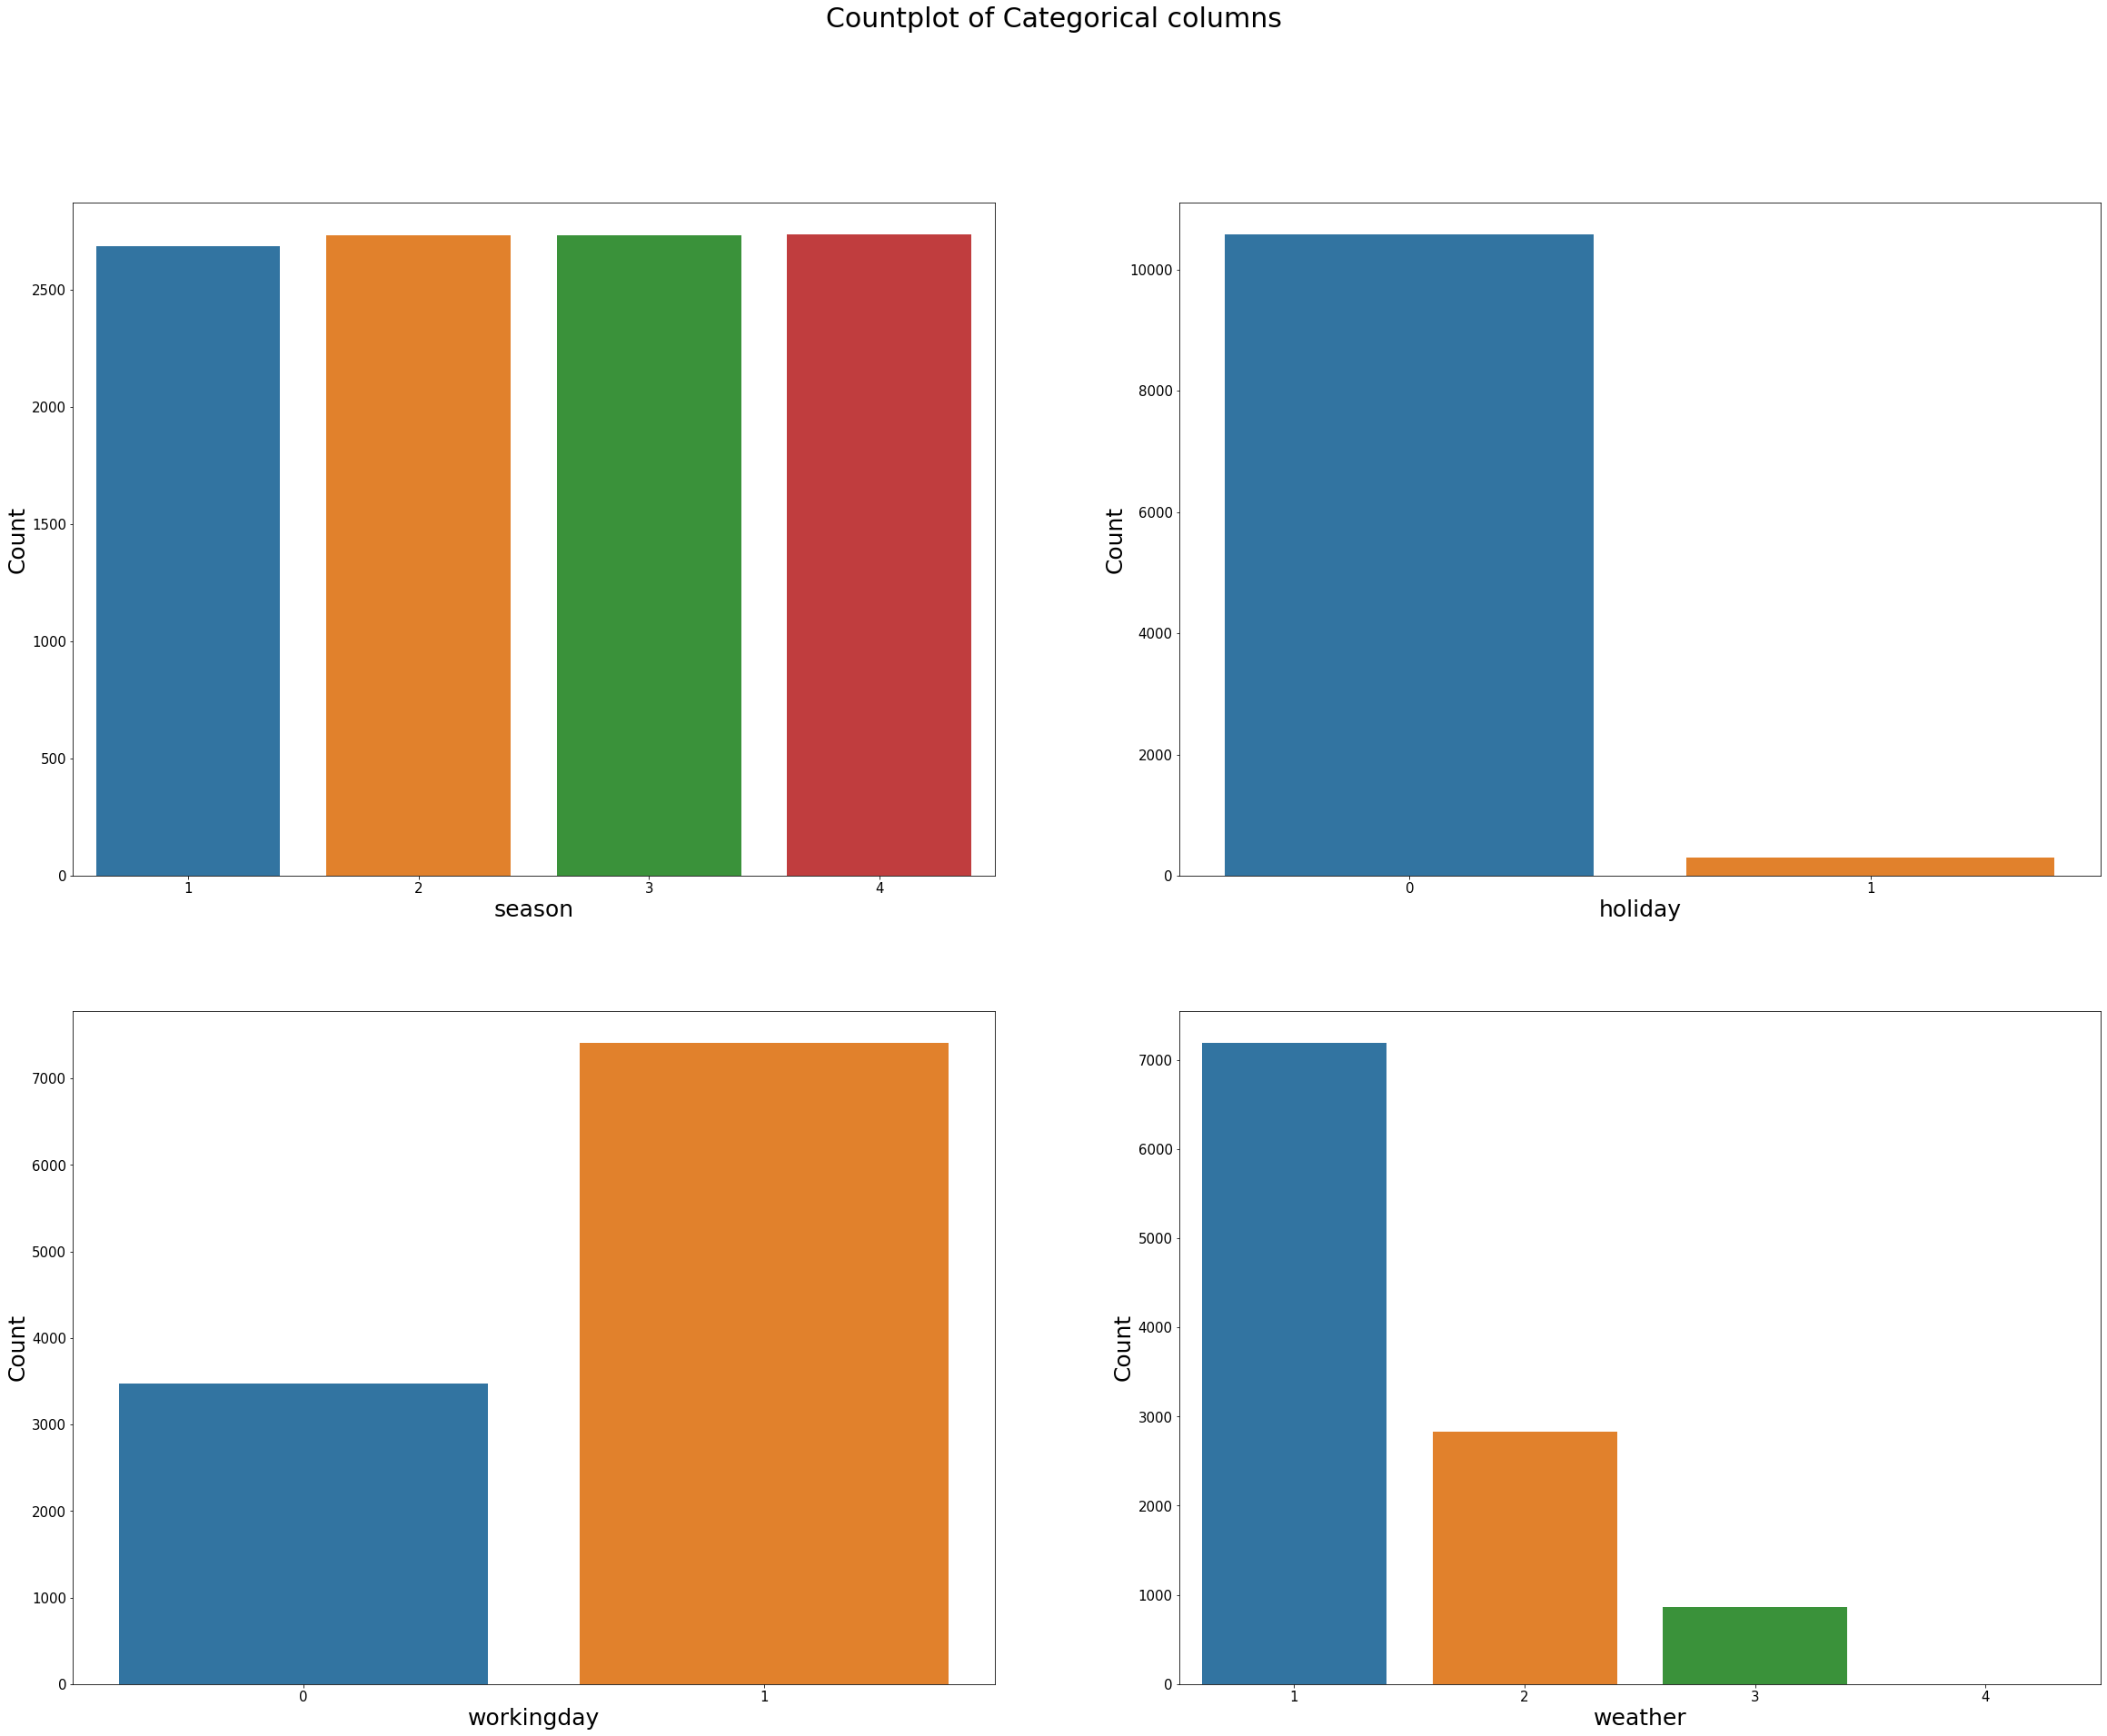

In [13]:
cat_columns_len = len(cat_cols) #Length of categorical columns
plt.rcParams['figure.figsize'] = (40, 30)
fig, axs = plt.subplots(int(round(cat_columns_len/2,0)), 2) # Create subplots

for i,col in enumerate(cat_cols): #Iterate through each categorical column
    sns.countplot(data=yulu_df, x=col, ax=axs[i//2,i%2])
    axs[i//2,i%2].set_xlabel(col,fontsize=25)
    axs[i//2,i%2].set_ylabel("Count",fontsize=25)
    axs[i//2,i%2].tick_params(labelsize=15)
    #axs[i//2,i%2].set_facecolor("grey")

fig.suptitle('Countplot of Categorical columns', fontsize=30)
plt.show()

#### Observations on Distribution of Categorical Columns
===========================================
1. Holiday & Workingday are skewed, which is obvious as there are more working days in a calendar year. 
2. Weather was either clear, or misty with few clouds. The other two categories are rare
3. Season has almost equal distribution across all 4 unique values

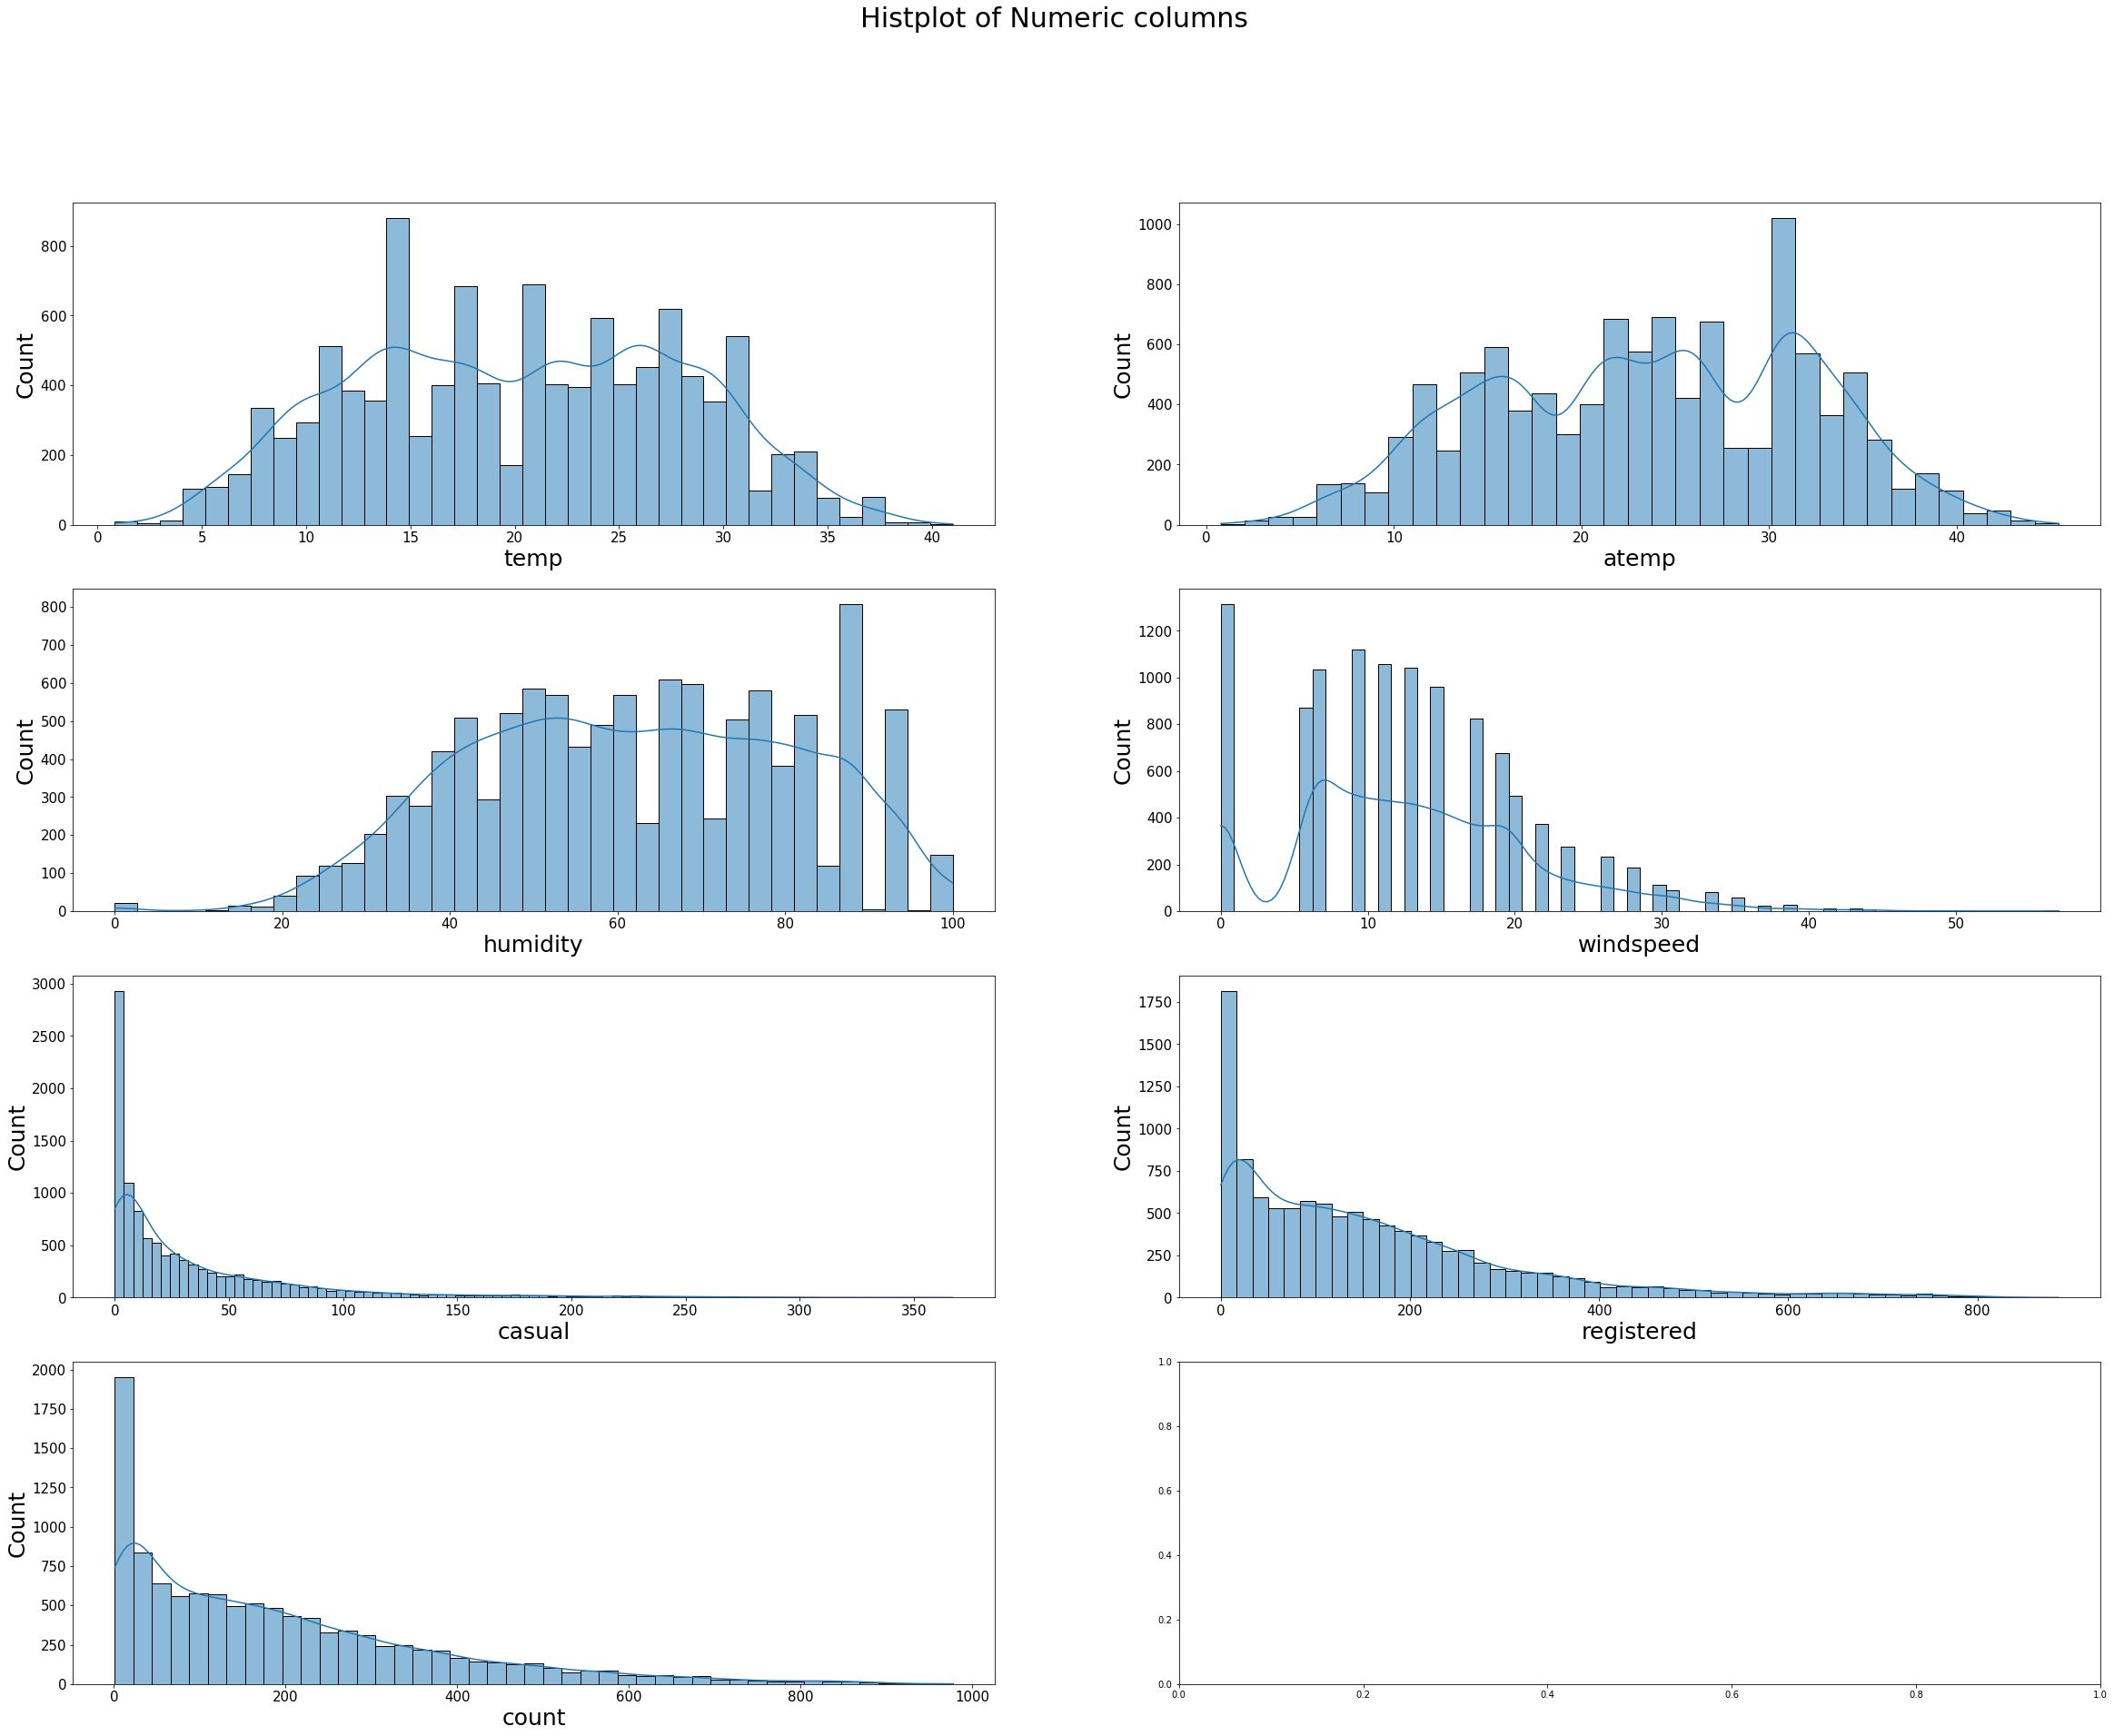

In [14]:
num_columns = [ele for ele in yulu_df.select_dtypes(include=['int','float']).columns] #Numerical Columns
num_columns_len = len(num_columns) 

plt.rcParams['figure.figsize'] = (40, 30)
fig, axs = plt.subplots(int(round(num_columns_len/2,0)), 2) # Create subplots

for i,col in enumerate(num_columns):
    sns.histplot(data=yulu_df, x=col, kde = True, ax=axs[i//2,i%2])
    axs[i//2,i%2].set_xlabel(col,fontsize=25)
    axs[i//2,i%2].set_ylabel("Count",fontsize=25)
    axs[i//2,i%2].tick_params(labelsize=15)
    #axs[i//2,i%2].set_facecolor("grey")

fig.suptitle('Histplot of Numeric columns', fontsize=30)
plt.show()

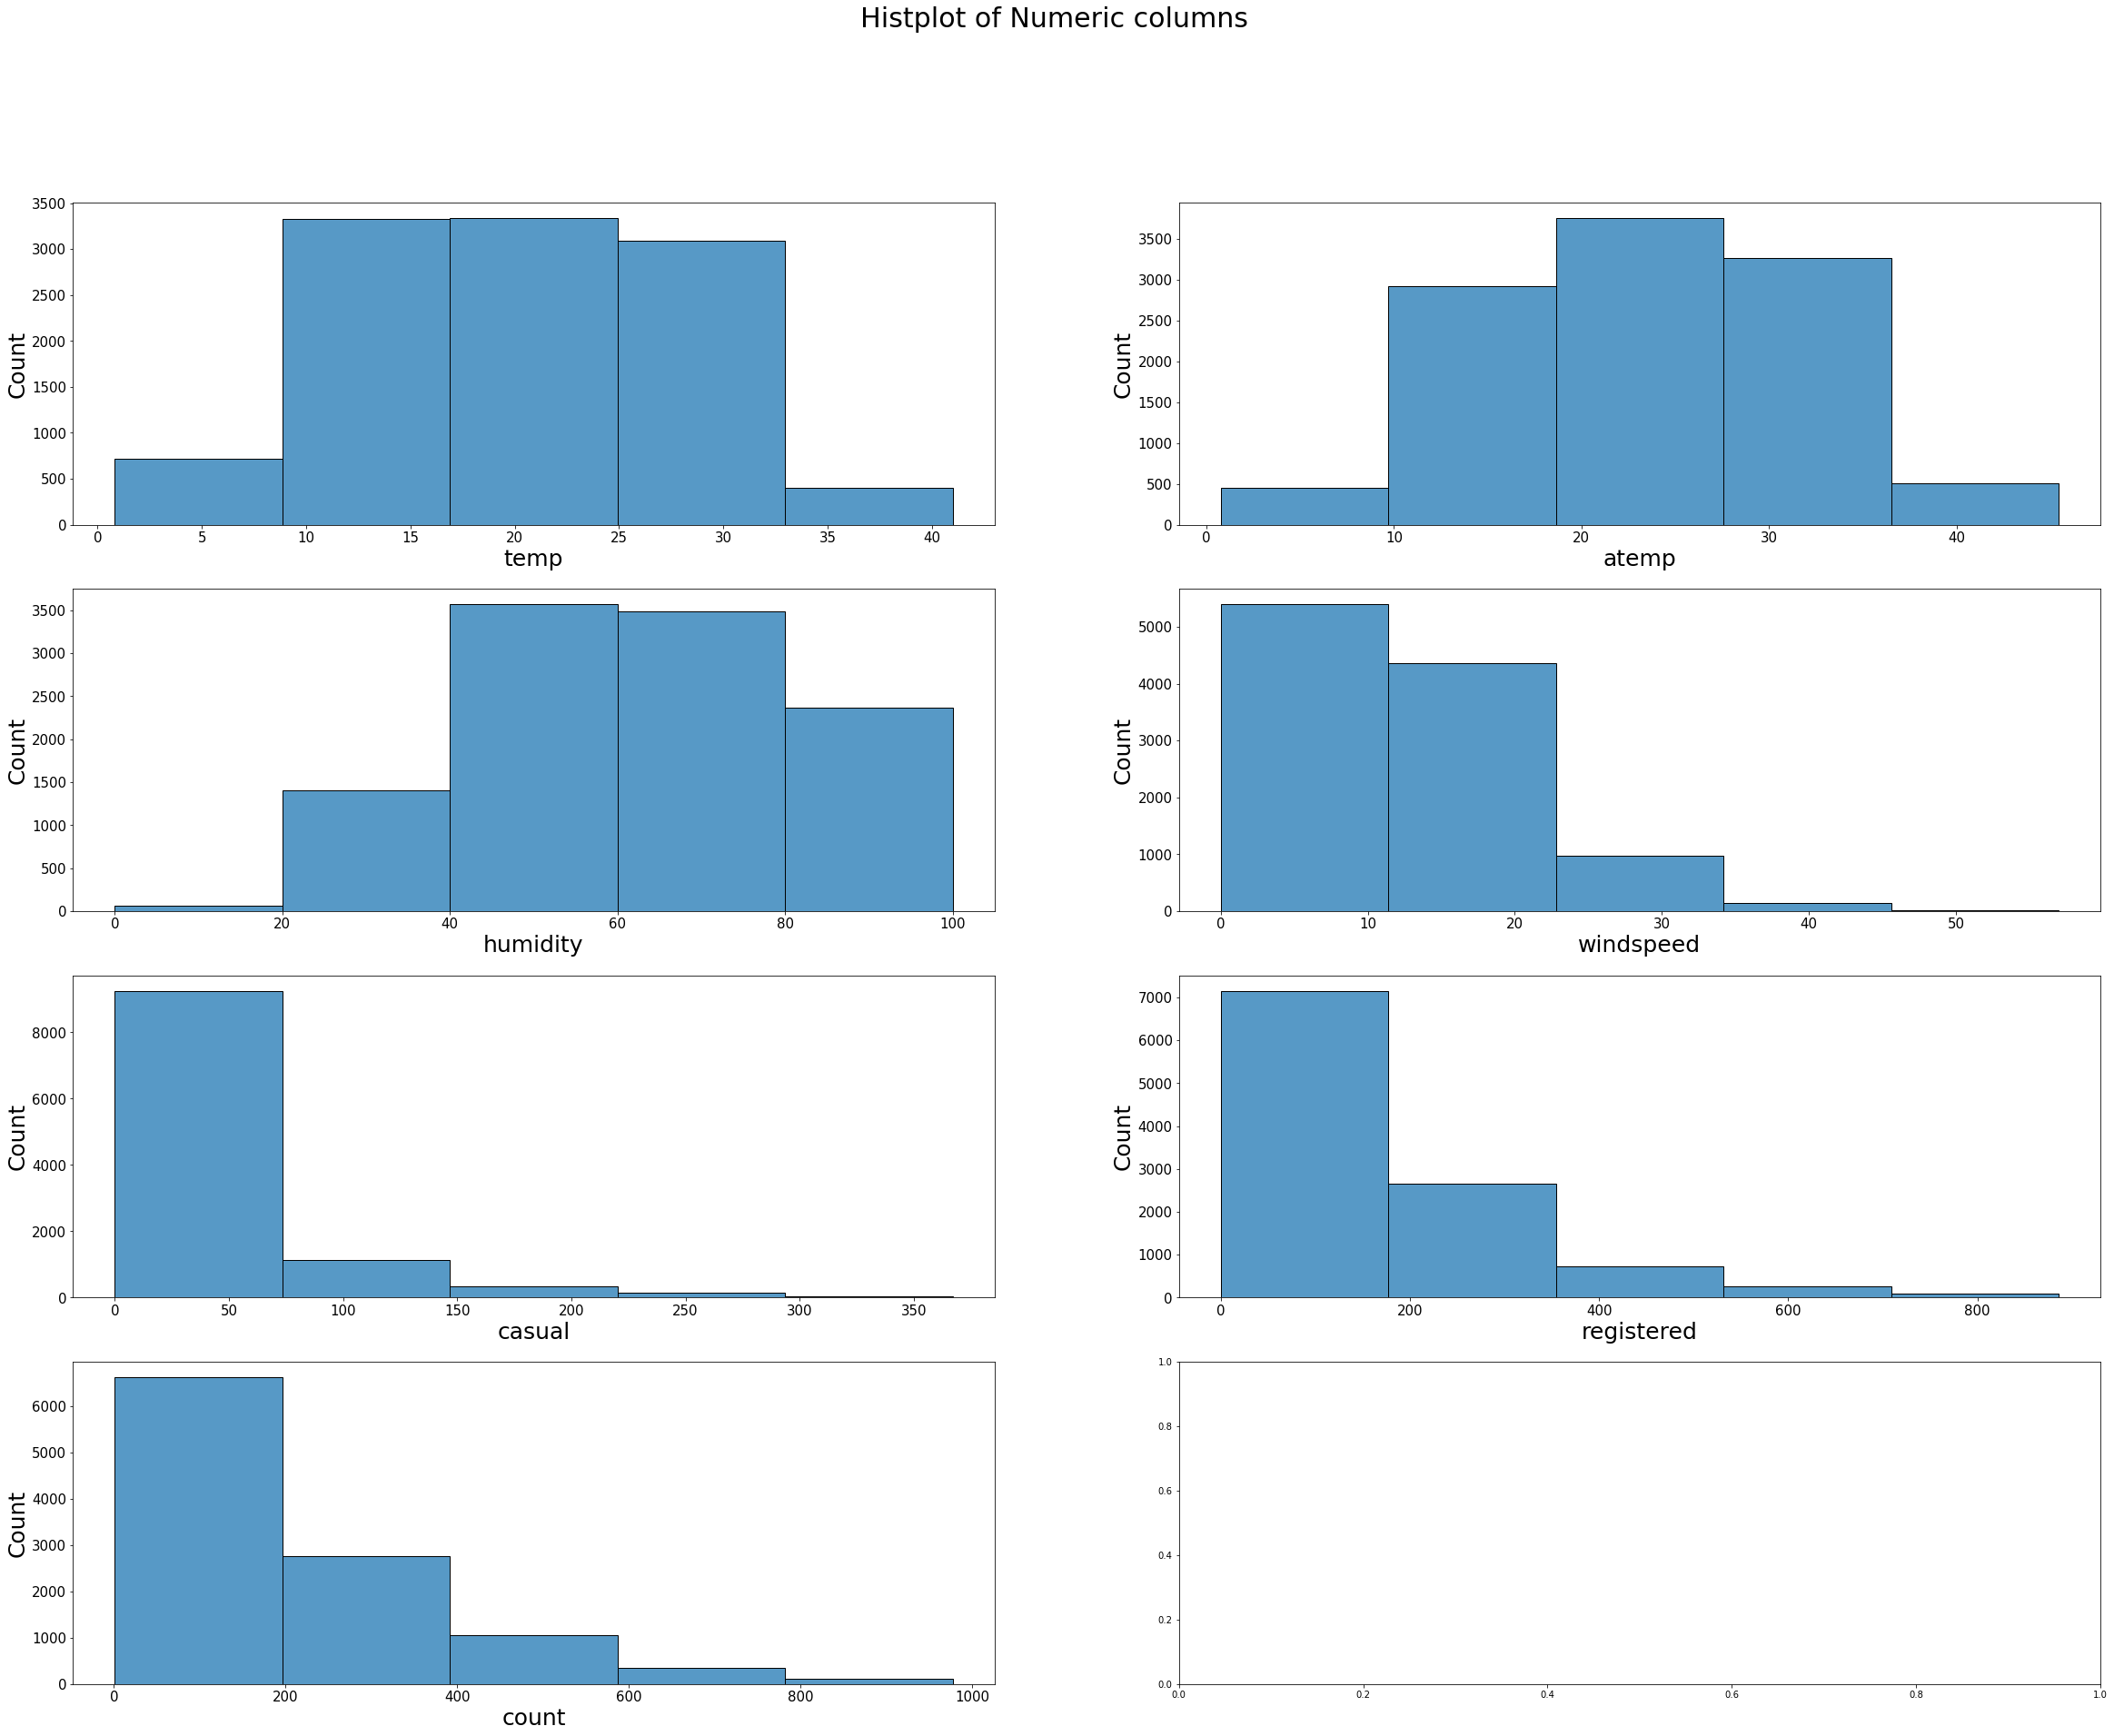

In [15]:
plt.rcParams['figure.figsize'] = (40, 30)
fig, axs = plt.subplots(int(round(num_columns_len/2,0)), 2) # Create subplots

for i,col in enumerate(num_columns):
    sns.histplot(data=yulu_df, x=col,bins=5, ax=axs[i//2,i%2])
    axs[i//2,i%2].set_xlabel(col,fontsize=25)
    axs[i//2,i%2].set_ylabel("Count",fontsize=25)
    axs[i//2,i%2].tick_params(labelsize=15)
    #axs[i//2,i%2].set_facecolor("grey")

fig.suptitle('Histplot of Numeric columns', fontsize=30)
plt.show()

####  Observations on Distribution of Numerical Columns
===========================================
1. Temp,atemp and humidity have normal distribution
2. Windspeed can be thought of having a binomial distribution, though binning it makes it left skewed.
3. Casual, registered and count are left skewed, and have a lognormal distribution

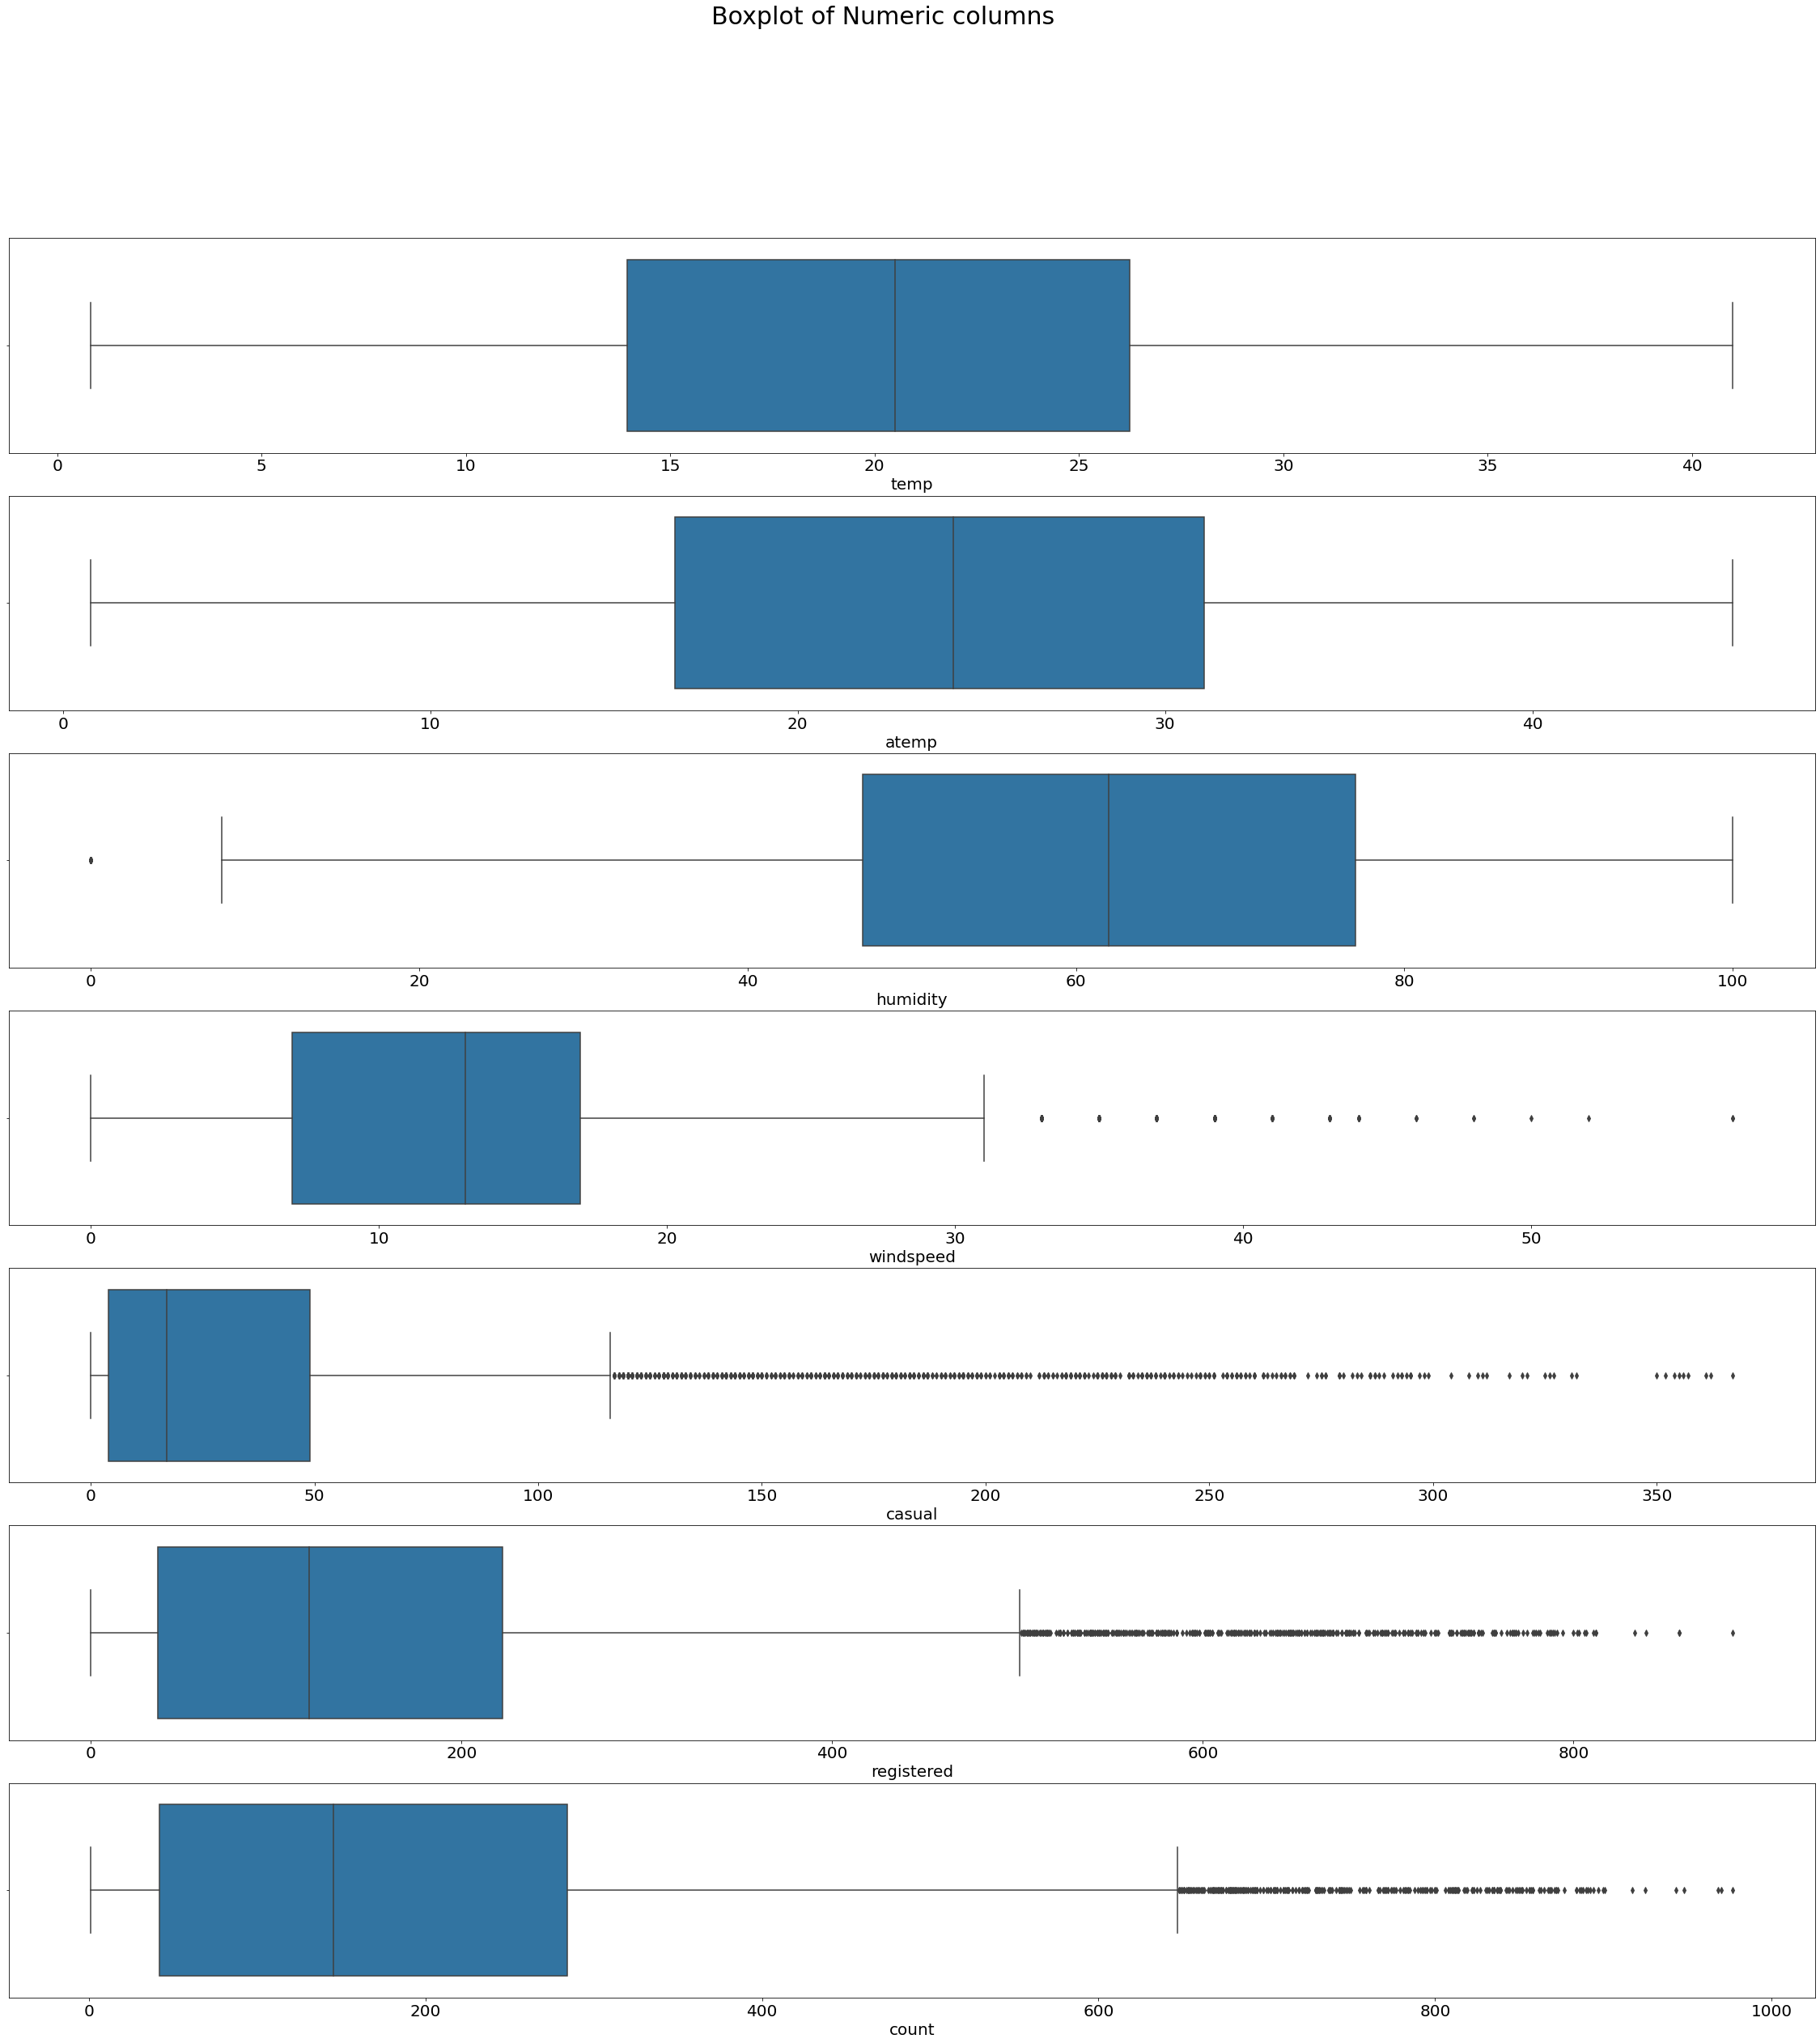

In [16]:
plt.rcParams['figure.figsize'] = (40, 40)
fig, axs = plt.subplots(num_columns_len, 1) #Create Subplots for Numerical cols
for i,col in enumerate(num_columns):
    sns.boxplot(data=yulu_df, x=col, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=20)
    axs[i].tick_params(labelsize=20)
    #axs[i].set_facecolor("grey")
fig.suptitle('Boxplot of Numeric columns', fontsize=30)
plt.show()

In [17]:
num_col_list = [ i for i in num_columns ]
df = yulu_df[num_col_list] #Create a df with only numerical columns

# Calculate the upper and lower bounds for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Determine the number of outliers for each column
outlier_counts = np.zeros(df.shape[1])
for i in range(df.shape[1]):
    column = df.iloc[:, i]
    outlier_counts[i] = np.sum((column < lower_bound[i]) | (column > upper_bound[i]))

# Create the dataframe with the percentage of outliers
df_outliers = pd.DataFrame({'Column': df.columns,
                            'Outlier Percentage': np.round(100 * outlier_counts / df.shape[0],2)})

df_outliers

,Column,Outlier Percentage
0,temp,0.00
1,atemp,0.00
2,humidity,0.20
3,windspeed,2.09
4,casual,6.88
5,registered,3.89
6,count,2.76


#### Outlier Analysis
====================
1. Outliers are present in windspeed,casual, registered and count
2. % of outliers in casual is high ~ 7%

### 2.Bivariate Analysis

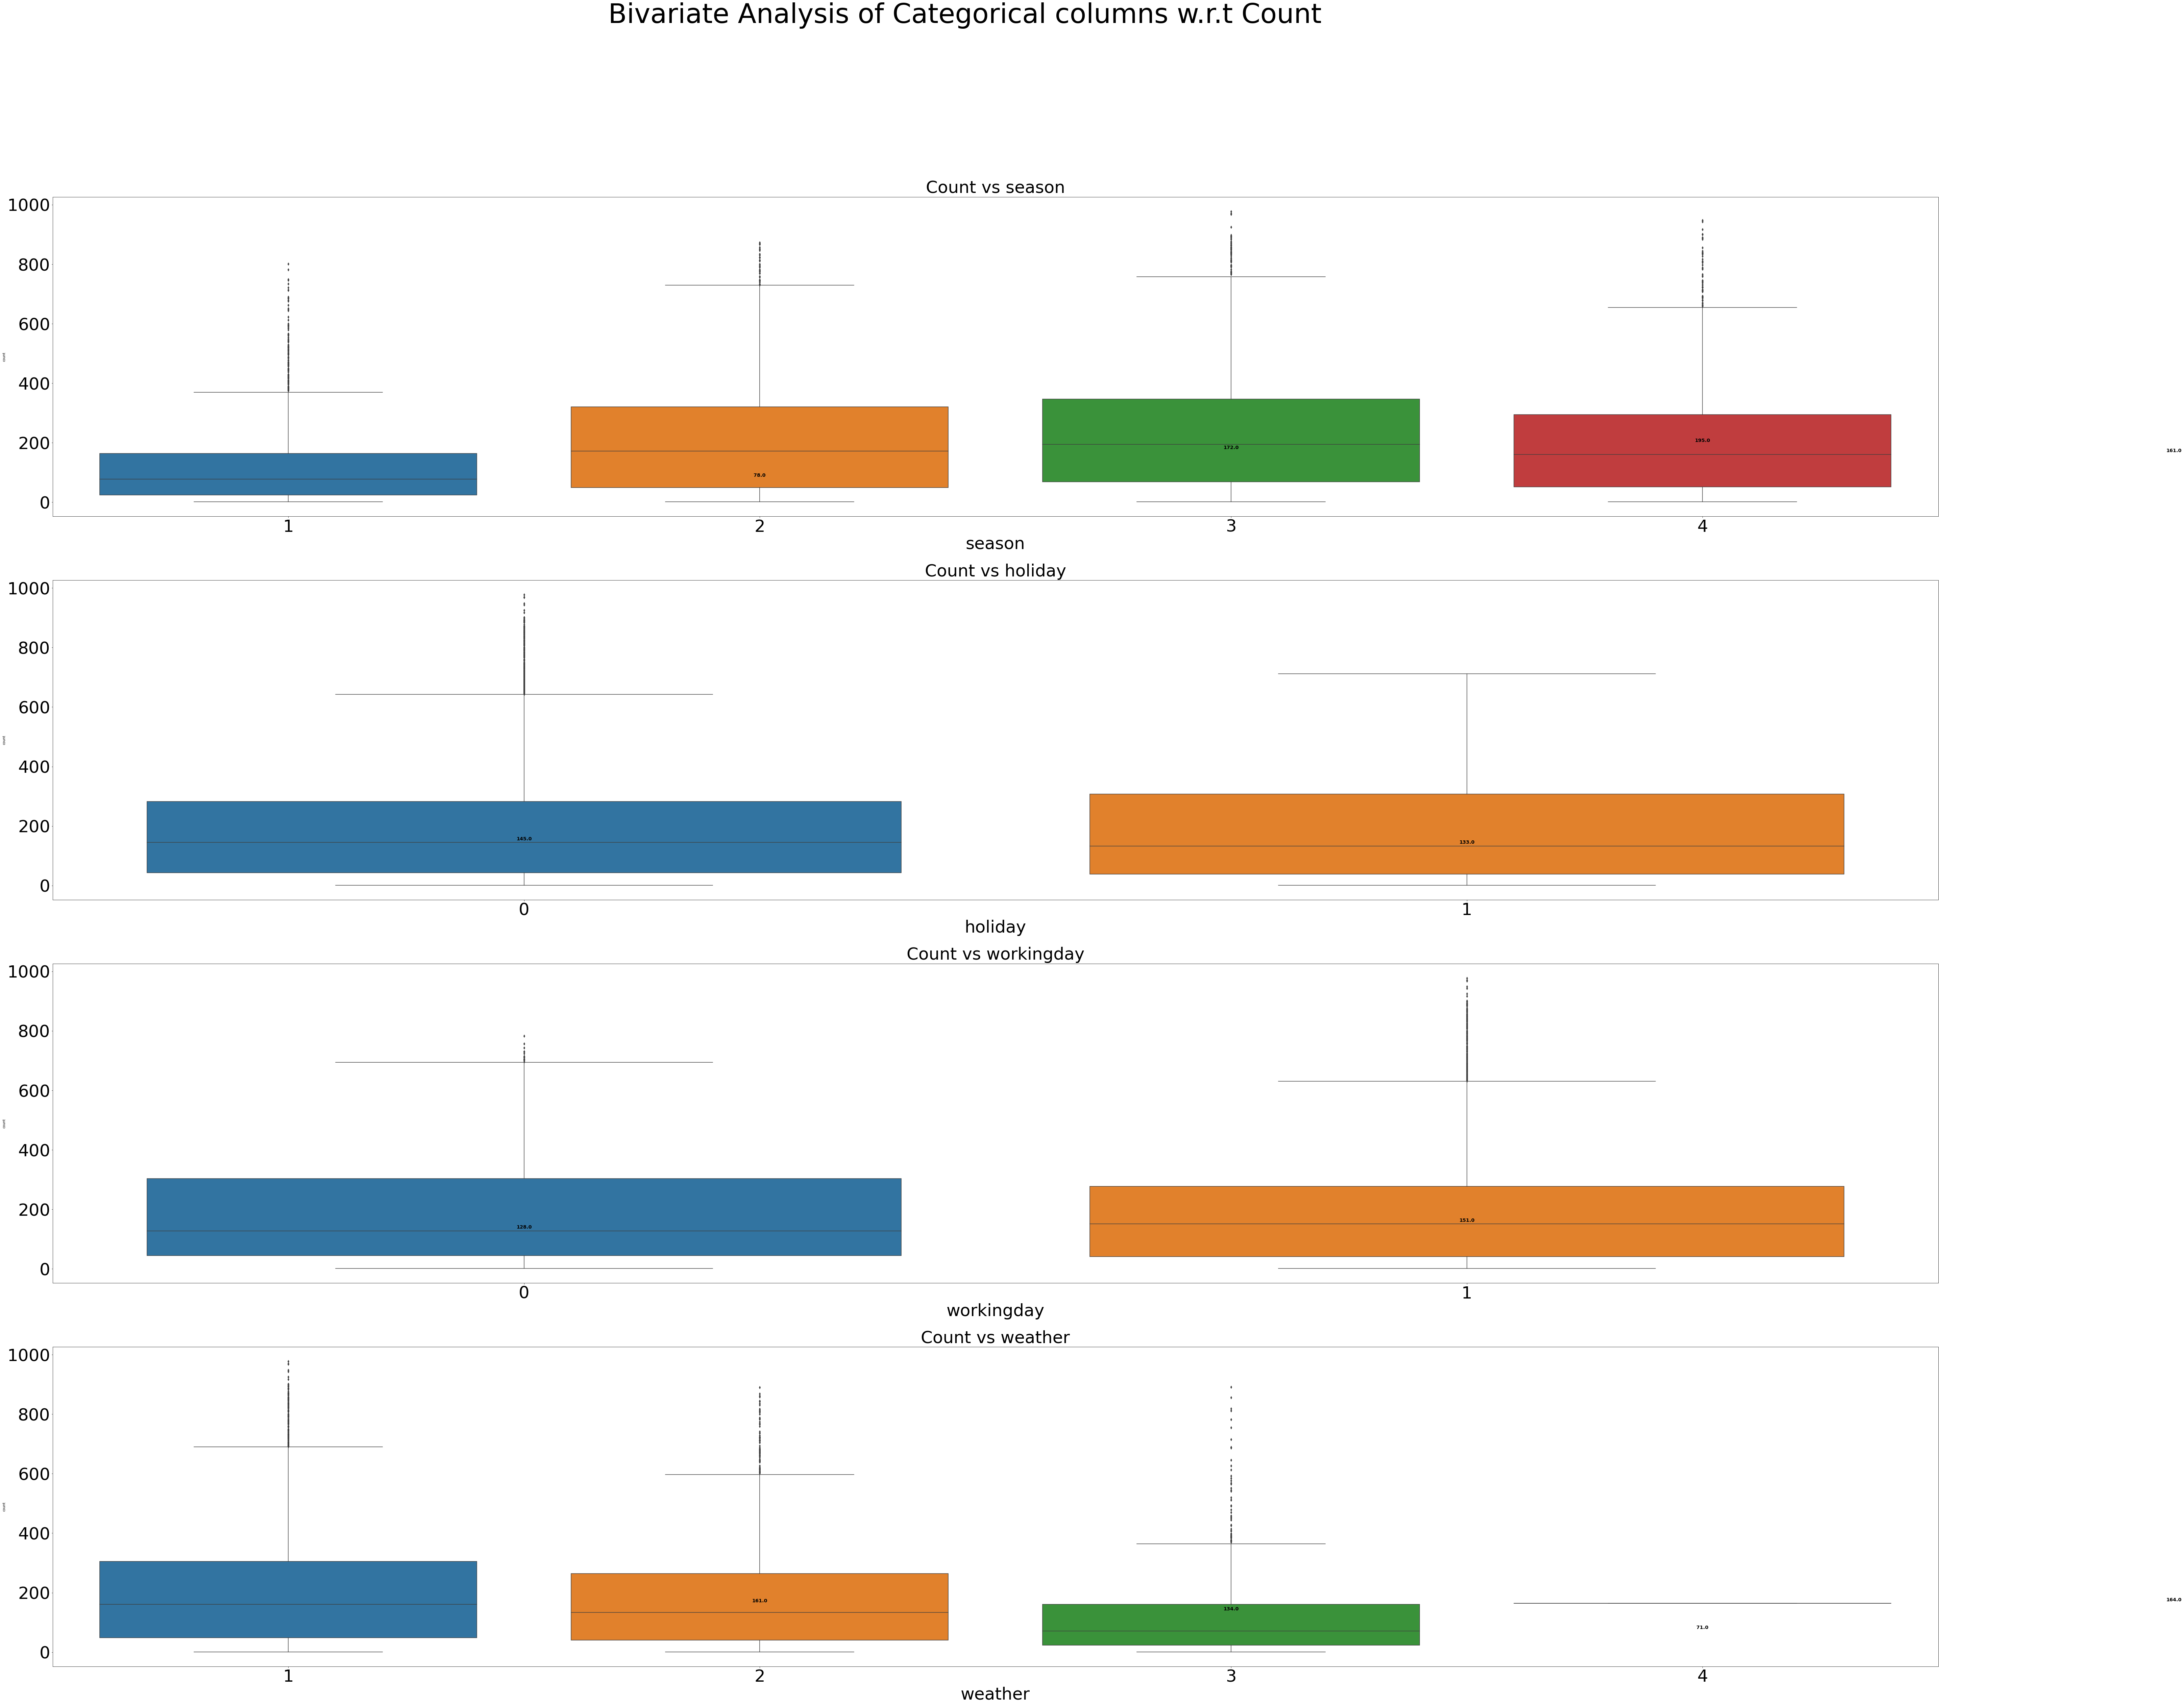

In [18]:
plt.rcParams['figure.figsize'] = (100, 80)
fig, axs = plt.subplots(len(cat_cols), 1)
for i,col in enumerate(cat_cols):
    box_plot = sns.boxplot(data = yulu_df, x = col,y = "count", ax=axs[i])
    medians = yulu_df.groupby(col)['count'].median()
    vertical_offset = yulu_df['count'].median() * 0.05 # offset from median for display
    
    # Display Median values
    for xtick in box_plot.get_xticks():
        if col in ["season","weather"]:
            xtick +=1
        box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')
    
    # Set up axis
    axs[i].set_title("Count vs {}".format(col), pad=12, fontsize=50)
    #axs[i].set_facecolor("grey")
    axs[i].set_xlabel(col,fontsize=50)
    axs[i].tick_params(labelsize=50)

fig.suptitle('Bivariate Analysis of Categorical columns w.r.t Count', fontsize=80)
plt.show()

#### Observations from Bivariate Analysis of Categorical Columns
===============================================================
1. Seasons 2 and 3, which is Summer and Fall account for maximum number of bikes
2. Riders enjoy clear weather(1), or Mist + Cloudy, Mist + Broken clouds. When it is snowing or raining, riders do not prefer to ride bikes
3. There doesn't seem to be any major difference based on holiday or working day

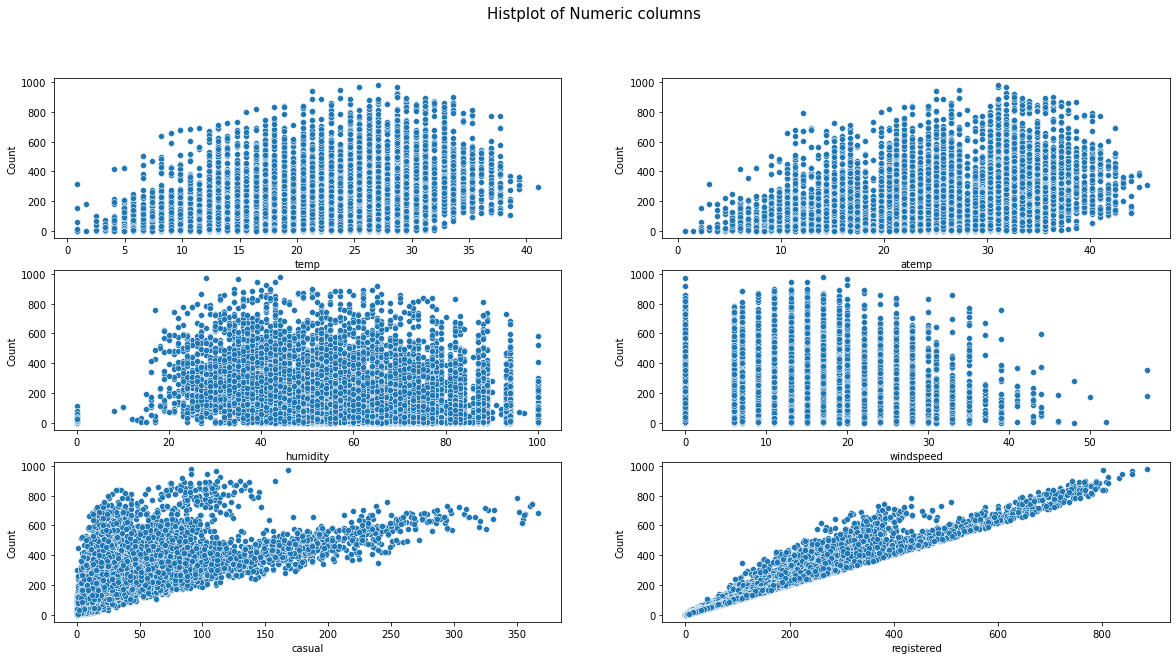

In [19]:
# plotting numerical variables against count using scatterplot
num_cols_scatter = [ i for i in num_columns if i!= 'count']
plt.rcParams['figure.figsize'] = (20, 10)
fig, axs = plt.subplots(int(round(len(num_cols_scatter)/2,0)), 2) # Create subplots

for i,col in enumerate(num_cols_scatter):
    sns.scatterplot(data=yulu_df, x=col,y='count', ax=axs[i//2,i%2])
    axs[i//2,i%2].set_xlabel(col,fontsize=10)
    axs[i//2,i%2].set_ylabel("Count",fontsize=10)
    axs[i//2,i%2].tick_params(labelsize=10)
    #axs[i//2,i%2].set_facecolor("grey")

fig.suptitle('Histplot of Numeric columns', fontsize=15)
plt.show()

#### Observations from Bivariate Analysis of Numerical Columns
===============================================================
1. Riders prefer to ride when the temperature isn't too low. Most of the rides were seen in the temp range 15-35.Very less bikes were rented when the temperature was less than 10.
2. Riders prefere riding in moderate humid conditions. Usually humidity less than 60, is considered to be comfortable, and therefore, we see an almost uniform distribution between 20-60.  Less rides were taken when humidity crossed 80. On the opposite end of the spectrum, when humidity was less than 20, very less bikes were rented, as this humidity causes dryness and exhaustion. 
3. Most riders preferred riding bikes, when the weather was not too windy. Very less bikes were rented when windspeed crossed 40. 

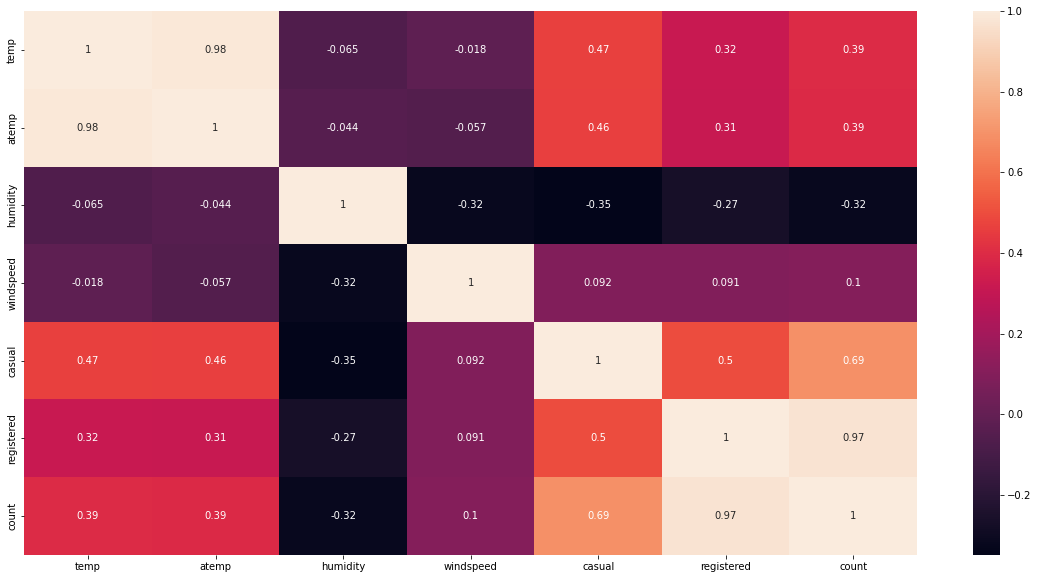

In [20]:
sns.heatmap(yulu_df.corr(), annot=True)
plt.show()

#### Observations from Correlation Analysis
===========================================
1. A high correlation is observed between registered and count. This is obvious as registered users use the service when needed, and rarely cancel. 

### 3. Hypothesis Tests

In [21]:
def check_normality_hist(col):
    '''
    This function tries to see if the groups formed based on unique values of categorical variables are 
    normal or not.
    The tests performed to check for Normality:-
    1. Visual Test : Histograms
    '''
    
    unique_vals = list(yulu_df[col].unique())
    df_list = [yulu_df[yulu_df[col]==i]['count'].values for i in unique_vals]
    
    plt.rcParams['figure.figsize'] = (10, 5)
    fig, axs = plt.subplots(len(unique_vals)//2, 2)
    
    if len(df_list) <= 2:
        for i,key in enumerate(unique_vals) : #Iterate through each categorical column
            sns.histplot(data=df_list[i], bins=5,ax=axs[i])
            axs[i].set_xlabel(key,fontsize=5)
            axs[i].set_ylabel("Count",fontsize=5)
            axs[i].tick_params(labelsize=5)
    else:
        for i,col in enumerate(unique_vals):
            sns.histplot(data=df_list[i],bins=5, ax=axs[i//2,i%2])
            axs[i//2,i%2].set_xlabel(col,fontsize=5)
            axs[i//2,i%2].set_ylabel("Count",fontsize=5)
            axs[i//2,i%2].tick_params(labelsize=5)

    fig.suptitle('Histplot of {}'.format(col), fontsize=10)
    plt.show()

In [22]:
def check_normality_qq(col):
    '''
    This function tries to see if the groups formed based on unique values of categorical variables are 
    normal or not.
    The tests performed to check for Normality:-
    1. Visual Test :Q-Q plot
    '''
    
    unique_vals = list(yulu_df[col].unique())
    df_list = [yulu_df[yulu_df[col]==i]['count'].values for i in unique_vals]
    
    plt.rcParams['figure.figsize'] = (5, 1)
    plt.title("Q-Q Plots for Normality for {}".format(col))
    
    for i in range(len(df_list)):
        stats.probplot(df_list[i],dist="norm",plot=plt)
        plt.show()
    

In [23]:
def check_normality_shapiro(col):
    '''
    This function tries to see if the groups formed based on unique values of categorical variables are 
    normal or not.
    The tests performed to check for Normality:-
    1. Shapiro Wilk Test
    '''
    
    unique_vals = list(yulu_df[col].unique())
    df_list = [yulu_df[yulu_df[col]==i]['count'].values for i in unique_vals]
    
    for i in range(len(df_list)):
        if len(df_list[i]) > 3:
            print(stats.shapiro(df_list[i]))
    
    return df_list

#### 3.1 2-Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

The assumptions of a 2 sample t-test are:

1. Independence: The samples are independent of each other and have been randomly selected.
2. Normality: The populations from which the samples were drawn are approximately normally distributed.
3. Equal Variance: The population variances are equal for the two groups.
4. Random Sampling: The samples were obtained using random sampling methods.

#### Null Hypothesis(H0): Working day has no effect on the number of cycles being rented.

#### Alternate Hypothesis(H1): Working day has effect on the number of cycles being rented.

#### Significance level (alpha): 0.05

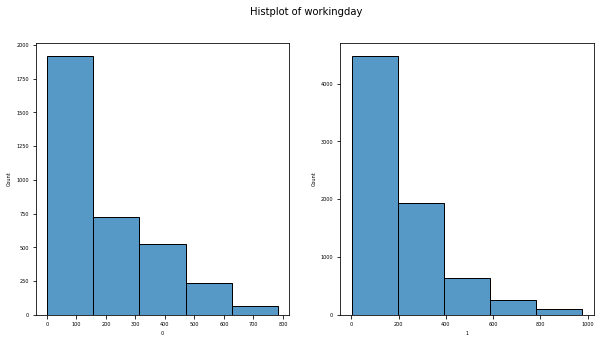

In [24]:
check_normality_hist('workingday')

#### Histogram shows that the samples are left skewed and not normal

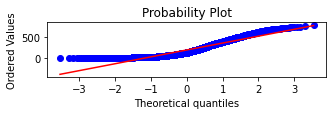

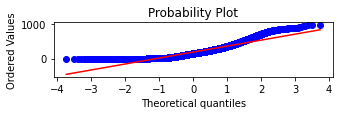

In [25]:
check_normality_qq('workingday')

#### Q-Q plots show that the quantiles do not lie on the 45 degree line, and are left skewed.

In [26]:
df_list = check_normality_shapiro('workingday')

ShapiroResult(statistic=0.8852126598358154, pvalue=4.203895392974451e-45)
ShapiroResult(statistic=0.8702576160430908, pvalue=0.0)


C:\Users\shuklas\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro-Wilk test is a commonly used statistical test to check for normality of a sample. It tests the null hypothesis that the sample comes from a normally distributed population.

The test returns two values, the test statistic W and the p-value. The test statistic W is calculated based on the sample and the expected values for a normal distribution, and the p-value is calculated from the test statistic.

If the p-value is less than a significance level (often 0.05), it indicates that there is evidence to reject the null hypothesis, meaning that the sample does not come from a normally distributed population. On the other hand, if the p-value is greater than the significance level, it indicates that there is not enough evidence to reject the null hypothesis, meaning that the sample can be considered as coming from a normally distributed population.

Shapiro Test also suggests that the samples are not normal

In [27]:
# Perform Levene's test
stats.levene(df_list[0],df_list[1])

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

#### As the p value (0.9) is non-significant, we fail to reject the null hypothesis and conclude that samples have equal variances.

In [28]:
stats.ttest_ind(a=df_list[0], b=df_list[1], equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

#### Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have  sufficient evidence to say that working day has effect on the number of cycles being rented.

#### 3.2 ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

The assumptions of ANOVA (Analysis of Variance) are:

1. Independence of observations.
2. Normality of populations.
3. Equal variances (homoscedasticity) of populations.
4. Additivity of population means across groups.

In this notebook, we test for Normality and Equal Variances, before doing ANOVA
For Normality, we use Histograms, Q-Q plots and Shapiro test.

For Equality of Variances, we infer from the box plot diagrams in the Section 2: Bivariate Analysis and Levene's Test

==================================================================================================
#### Null Hypothesis (H0): Number of cycles rented is similar in different weather and season.

#### Alternate Hypothesis(H1): Number of cycles rented is not similar in different weather and season.

#### Significance level (alpha): 0.05
=================================================================================================

#### 3.2.1 Weather

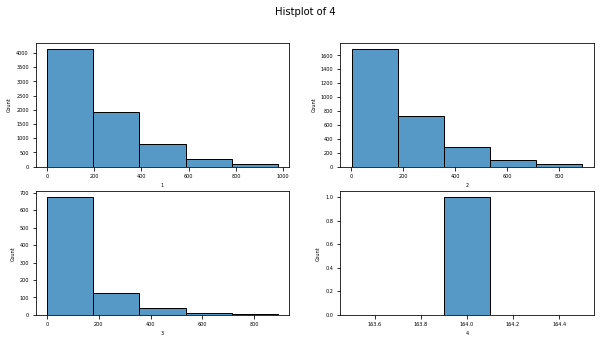

In [29]:
check_normality_hist('weather')

##### Histogram shows that the samples are left skewed and not normal

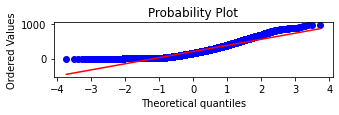

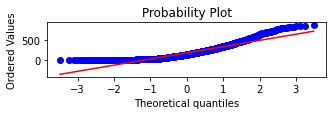

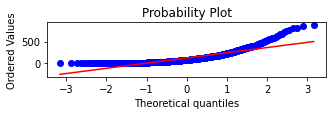

C:\Users\shuklas\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\shuklas\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\shuklas\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


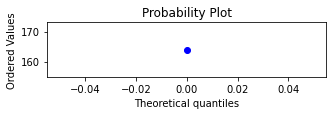

In [30]:
check_normality_qq('weather')

##### Q-Q plots show that the quantiles do not lie on the 45 degree line, and are left skewed.

In [31]:
df_list = check_normality_shapiro('weather')

ShapiroResult(statistic=0.8909225463867188, pvalue=0.0)
ShapiroResult(statistic=0.8767690658569336, pvalue=9.781063280987223e-43)
ShapiroResult(statistic=0.7674333453178406, pvalue=3.876134581802921e-33)


C:\Users\shuklas\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since the p-value is less than a significance level (often 0.05), it indicates that there is evidence to reject the null hypothesis, meaning that the sample does not come from a normally distributed population.

In [32]:
# Perform Levene's test
stats.levene(df_list[0],df_list[1],df_list[2],df_list[3])

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

#### As the p value is significant, we reject the null hypothesis and conclude that samples have unequal variances.

In [33]:
# conduct the one-way anova
stats.f_oneway(df_list[0],df_list[1],df_list[2],df_list[3])

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

#### Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather

#### 3.2.1 Season

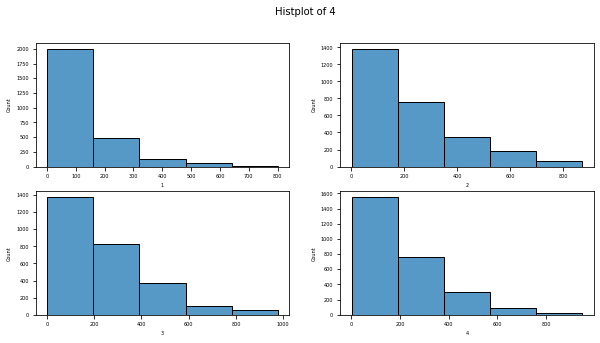

In [34]:
check_normality_hist('season')

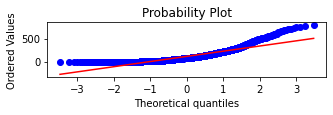

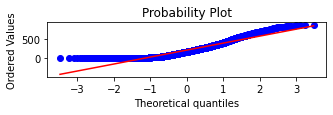

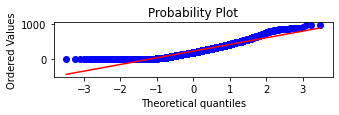

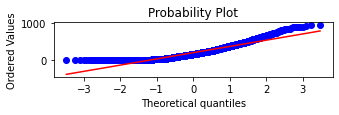

In [35]:
check_normality_qq('season')

In [36]:
df_list = check_normality_shapiro('season')

ShapiroResult(statistic=0.8087379336357117, pvalue=0.0)
ShapiroResult(statistic=0.9004813432693481, pvalue=6.038565025570219e-39)
ShapiroResult(statistic=0.9148167371749878, pvalue=1.0437356147871525e-36)
ShapiroResult(statistic=0.8954642415046692, pvalue=1.130082751748606e-39)


OBSERVATIONS ON NORMALITY
1. Histogram shows that the samples are left skewed and not normal
2. Q-Q plots show that the quantiles do not lie on the 45 degree line, and are left skewed
3. From Shapiro Test,As the p value is significant, we reject the null hypothesis and conclude that distribution is not normal.

In [37]:
# Perform Levene's test
stats.levene(df_list[0],df_list[1],df_list[2],df_list[3])

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

As the p value is significant, we reject the null hypothesis and conclude that samples have unequal variances.

In [38]:
# conduct the one-way anova
stats.f_oneway(df_list[0],df_list[1],df_list[2],df_list[3])

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

#### Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different seasons

#### 3.3 Chi-square test to check if Weather is dependent on the season

The assumptions of a chi-square test are:

1. Independence: The observations are independent of each other and not related in any way.
2. Random Sampling: The sample was obtained using random sampling methods.
3. Appropriate Data: The data should be nominal or ordinal in nature and not continuous.
4. Large Sample Size: The sample size should be large enough to ensure that the chi-square distribution approximates the true distribution.
5. Expected Frequency: The expected frequency for each cell in the contingency table should be at least 5.

#### Null Hypothesis (H0): Weather is independent of the season

#### Alternate Hypothesis (H1): Weather is not independent of the season

#### Significance level (alpha): 0.05

In [39]:
contingency_table = pd.crosstab(yulu_df['season'], yulu_df['weather'])
print("Observed values:")
contingency_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [40]:
# Minimum frequency should be 5
df_new=yulu_df[yulu_df['weather']!=4]
weather_season_new=pd.crosstab(index=df_new['season'],columns=df_new['weather'])
weather_season_new

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [41]:
# Perform chi-square test
chi2, p, dof, expected_frequency = stats.chi2_contingency(weather_season_new)

# Check if the result is significant
alpha = 0.05
if p < alpha:
    print("The result is significant, reject the null hypothesis")
else:
    print("The result is not significant, fail to reject the null hypothesis")

The result is significant, reject the null hypothesis


#### Since p-value is less than 0.05, we reject the null hypothesis. This implies that Weather is dependent on season

### 4.Recommendations

#### There should be proper planning to avoid over stocking of bikes or inventory obsolescence. #### 
1. Due to high demand in summer and fall seasons, the company should have more inventory of bikes. 
2. With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
3. If the humidity is too low, the company should divert the bikes to some other region/area, as the demand would less in low humidity.
4. In extremely cold days ( temp less than 10), the company can rent out the inventory to companies such as food delivery apps, as registered riders wouldn't be using it a lot. 
5. Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.